# Imports and set up

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
DATA_PATH = '/home/dreamtim/Coding/ITMO/itmo-cpp/with_descriptors.csv'
SEED = 42

# Load the data

In [3]:
df = pd.read_csv(DATA_PATH)
df

,sequence,extra_name,cpp_category,seq_length,cpp_type,origin,mol_weight,is_cpp_3,sequence_category,standard_sequence,...,is_valid_smiles,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy
0,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,31,NaN,NaN,3151.8362,yes,Peptide with Substitutions,AKKKKKRFSFKKSFKLSGFSFKKNKK,...,True,0.192308,10.653846,11.608322,0.538462,0.230769,0.230769,0.0,0.0,-1.492308
1,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,27,NaN,NaN,2785.1939,yes,Peptide with Substitutions,ARKRRQTSMTDFYHSKRRLIFS,...,True,0.136364,115.700455,11.839377,0.227273,0.181818,0.318182,1490.0,1490.0,-1.272727
2,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,48,NaN,NaN,NaN,yes,Biotinylated,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,39,NaN,NaN,NaN,yes,Biotinylated,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,?A-RR-[KRRRRRE],NaN,NaN,15,NaN,NaN,1439.6794,yes,Unknown,ARRKRRRRRE,...,True,0.000000,328.000000,11.999968,0.300000,0.000000,0.000000,0.0,0.0,-3.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,vrlpppvrlpppvrlppp,NaN,NaN,18,NaN,NaN,NaN,yes,Enantiomer Mix,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2918,ykqchkkGGkkGsG,NaN,NaN,14,NaN,NaN,246.2205,yes,Enantiomer Mix,GGGG,...,True,0.000000,100.050000,5.525000,0.000000,1.000000,0.000000,0.0,0.0,-0.400000
2919,"α,ε(Stearyl-AGYLLG)2KINLKALAALAKKIL",NaN,NaN,35,NaN,NaN,2269.8105,yes,Uptake with Stearyl,SAGYLLGKINLKALAALAKKIL,...,True,0.045455,-0.995455,10.176286,0.681818,0.181818,0.409091,1490.0,1490.0,0.854545
2920,δ-(Stearyl-AGYLLG)OINLKALAALAKKIL,NaN,NaN,33,NaN,NaN,NaN,yes,Uptake with Stearyl,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['sequence', 'extra_name', 'cpp_category', 'seq_length', 'cpp_type',
       'origin', 'mol_weight', 'is_cpp_3', 'sequence_category',
       'standard_sequence', 'nh3_tail', 'po3_pos', 'biotinylated',
       'acylated_n_terminal', 'cyclic', 'amidated', 'stearyl_uptake',
       'hexahistidine_tagged', 'modifications', 'adjusted_sequence',
       'smiles_sequence', 'is_valid_smiles', 'aromaticity',
       'instability_index', 'isoelectric_point', 'helix_fraction',
       'turn_fraction', 'sheet_fraction',
       'molar_extinction_coefficient_reduced',
       'molar_extinction_coefficient_oxidized', 'gravy'],
      dtype='object')

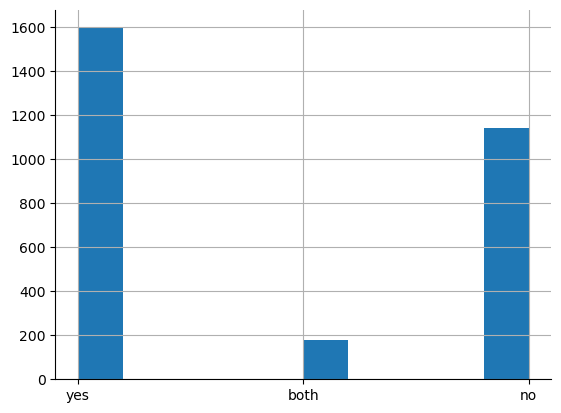

In [5]:
df.is_cpp_3.hist()
sns.despine()
plt.show()

In [6]:
df_filtered = df.pipe(
    lambda x: x[x.is_cpp_3.isin(['yes', 'no'])]
).pipe(
    lambda x: x[x.standard_sequence.notna()]
)

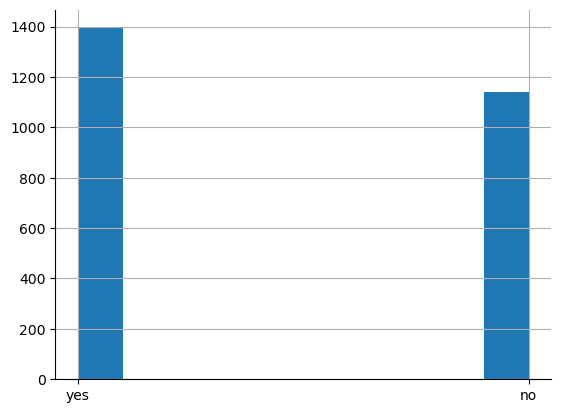

In [7]:
df_filtered.is_cpp_3.hist()
sns.despine()
plt.show()

**Dataset is ballanced!**

In [8]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2538 entries, 0 to 2921
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   sequence                               2538 non-null   object 
 1   extra_name                             121 non-null    object 
 2   cpp_category                           747 non-null    object 
 3   seq_length                             2538 non-null   int64  
 4   cpp_type                               76 non-null     object 
 5   origin                                 7 non-null      object 
 6   mol_weight                             2538 non-null   float64
 7   is_cpp_3                               2538 non-null   object 
 8   sequence_category                      2538 non-null   object 
 9   standard_sequence                      2538 non-null   object 
 10  nh3_tail                               2538 non-null   bool   
 11  po3_pos  

Full info:

```
<class 'pandas.core.frame.DataFrame'>
Index: 2538 entries, 0 to 2921
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   sequence                               2538 non-null   object 
 1   extra_name                             121 non-null    object 
 2   cpp_category                           747 non-null    object 
 3   seq_length                             2538 non-null   int64  
 4   cpp_type                               76 non-null     object 
 5   origin                                 7 non-null      object 
 6   mol_weight                             2538 non-null   float64
 7   is_cpp_3                               2538 non-null   object 
 8   sequence_category                      2538 non-null   object 
 9   standard_sequence                      2538 non-null   object 
 10  nh3_tail                               2538 non-null   bool   
 11  po3_pos                                2538 non-null   bool   
 12  biotinylated                           2538 non-null   bool   
 13  acylated_n_terminal                    2538 non-null   bool   
 14  cyclic                                 2538 non-null   bool   
 15  amidated                               2538 non-null   bool   
 16  stearyl_uptake                         2538 non-null   bool   
 17  hexahistidine_tagged                   2538 non-null   bool   
 18  modifications                          2538 non-null   object 
 19  adjusted_sequence                      2538 non-null   object 
 20  smiles_sequence                        2533 non-null   object 
 21  is_valid_smiles                        2538 non-null   bool   
 22  aromaticity                            2538 non-null   float64
 23  instability_index                      2538 non-null   float64
 24  isoelectric_point                      2538 non-null   float64
 25  helix_fraction                         2538 non-null   float64
 26  turn_fraction                          2538 non-null   float64
 27  sheet_fraction                         2538 non-null   float64
 28  molar_extinction_coefficient_reduced   2538 non-null   float64
 29  molar_extinction_coefficient_oxidized  2538 non-null   float64
 30  gravy                                  2538 non-null   float64
dtypes: bool(9), float64(10), int64(1), object(11)
memory usage: 478.4+ KB
```

# Baseline models

NOTE: DEPENDENCIES ARE IN `requirements.txt` and `environment.yml`

In [9]:
# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# For evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

### Classification

In [10]:
# For classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

##### Prepare 

In [109]:
columns_to_drop = [
    'extra_name', 'cpp_category', 'cpp_type', 'origin',
    'sequence', 'standard_sequence', 'adjusted_sequence',
    'smiles_sequence', 'modifications', 'sequence_category', 'is_valid_smiles'
]

df_clean = df_filtered.drop(columns=columns_to_drop)
print('Columns after dropping:')
for col in df_clean.columns:
    print(col)

Columns after dropping:
seq_length
mol_weight
is_cpp_3
nh3_tail
po3_pos
biotinylated
acylated_n_terminal
cyclic
amidated
stearyl_uptake
hexahistidine_tagged
aromaticity
instability_index
isoelectric_point
helix_fraction
turn_fraction
sheet_fraction
molar_extinction_coefficient_reduced
molar_extinction_coefficient_oxidized
gravy


In [110]:
df_encoded = df_clean.copy()
bool_cols = df_encoded.columns[df_encoded.dtypes == 'bool'].tolist()
for col in bool_cols:
    df_encoded[col] = df_encoded[col].astype(int)

In [111]:
# Check for missing values
print(f"Missing values before imputation:\n{df_encoded.isnull().sum()}")

Missing values before imputation:
seq_length                               0
mol_weight                               0
is_cpp_3                                 0
nh3_tail                                 0
po3_pos                                  0
biotinylated                             0
acylated_n_terminal                      0
cyclic                                   0
amidated                                 0
stearyl_uptake                           0
hexahistidine_tagged                     0
aromaticity                              0
instability_index                        0
isoelectric_point                        0
helix_fraction                           0
turn_fraction                            0
sheet_fraction                           0
molar_extinction_coefficient_reduced     0
molar_extinction_coefficient_oxidized    0
gravy                                    0
dtype: int64


In [112]:
# Encode target variable
label_encoder = LabelEncoder()
df_encoded['is_cpp_3'] = label_encoder.fit_transform(df_encoded['is_cpp_3'])

# Verify encoding
print(df_encoded['is_cpp_3'].value_counts())

is_cpp_3
1    1397
0    1141
Name: count, dtype: int64


In [113]:
# Define features and target
X = df_encoded.drop('is_cpp_3', axis=1)
y = df_encoded['is_cpp_3']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (2538, 19)
Target vector shape: (2538,)


In [114]:
# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (2030, 19)
Testing set shape: (508, 19)


In [115]:
def plot_confusion_matrix(y_true, y_pred, labels, title='Confusion Matrix'):
    """
    Plots a confusion matrix using seaborn heatmap.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    labels (list): List of label names.
    title (str): Title of the plot.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

##### Logistic regression

In [116]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       228
           1       0.81      0.84      0.82       280

    accuracy                           0.80       508
   macro avg       0.80      0.80      0.80       508
weighted avg       0.80      0.80      0.80       508



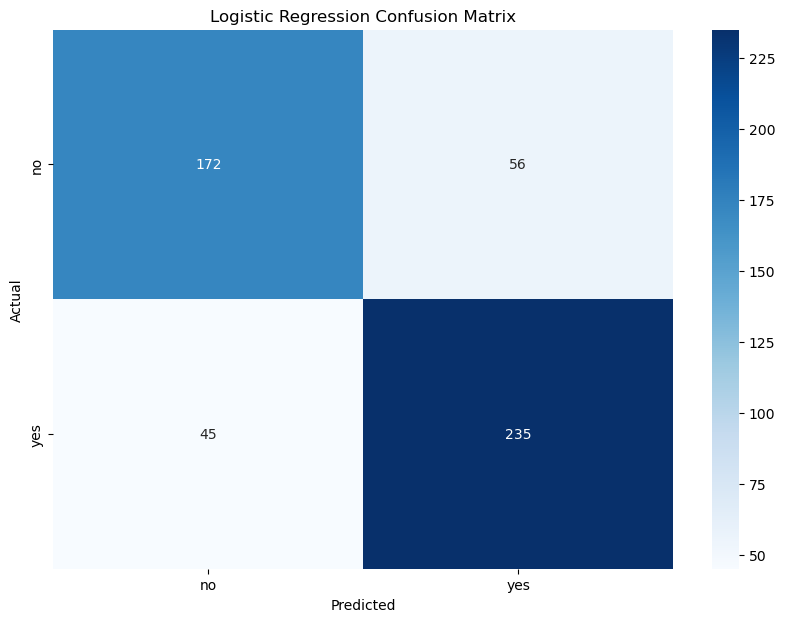

In [117]:
plot_confusion_matrix(y_test, y_pred_lr, labels=['no', 'yes'], title='Logistic Regression Confusion Matrix')

##### Decision Tree Classifier

In [118]:
# Initialize Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model
dt_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       228
           1       0.80      0.86      0.83       280

    accuracy                           0.81       508
   macro avg       0.81      0.80      0.80       508
weighted avg       0.81      0.81      0.80       508



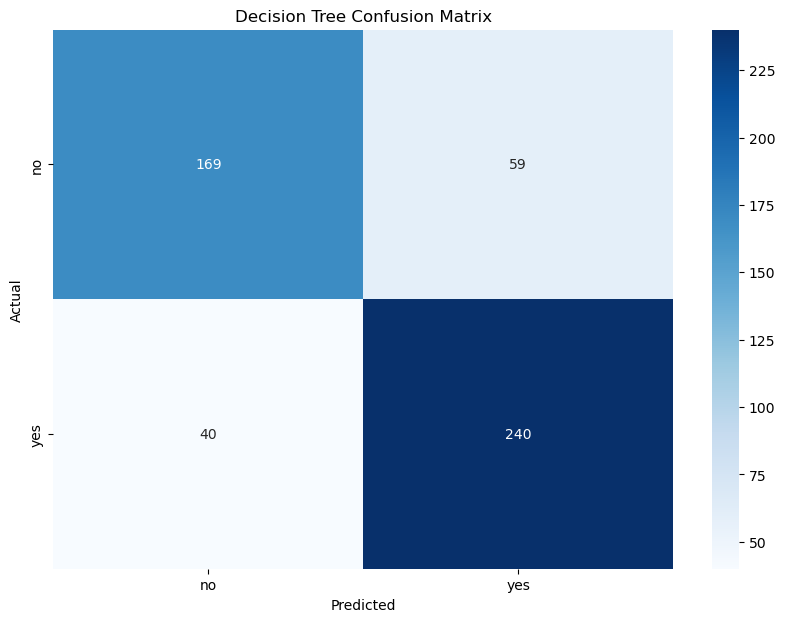

In [119]:
plot_confusion_matrix(y_test, y_pred_dt, labels=['no', 'yes'], title='Decision Tree Confusion Matrix')

##### Random Forest Classifier

In [120]:
# Initialize Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       228
           1       0.89      0.86      0.87       280

    accuracy                           0.86       508
   macro avg       0.86      0.86      0.86       508
weighted avg       0.86      0.86      0.86       508



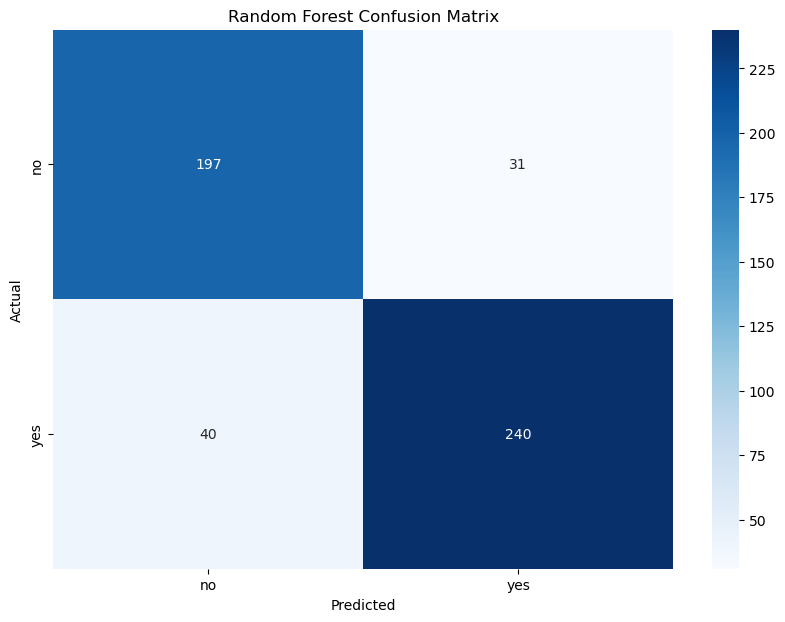

In [121]:
plot_confusion_matrix(y_test, y_pred_rf, labels=['no', 'yes'], title='Random Forest Confusion Matrix')

##### SVM

In [122]:
# Initialize SVM
svm_clf = SVC(probability=True, random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.34      0.43       228
           1       0.60      0.81      0.69       280

    accuracy                           0.60       508
   macro avg       0.59      0.57      0.56       508
weighted avg       0.59      0.60      0.57       508



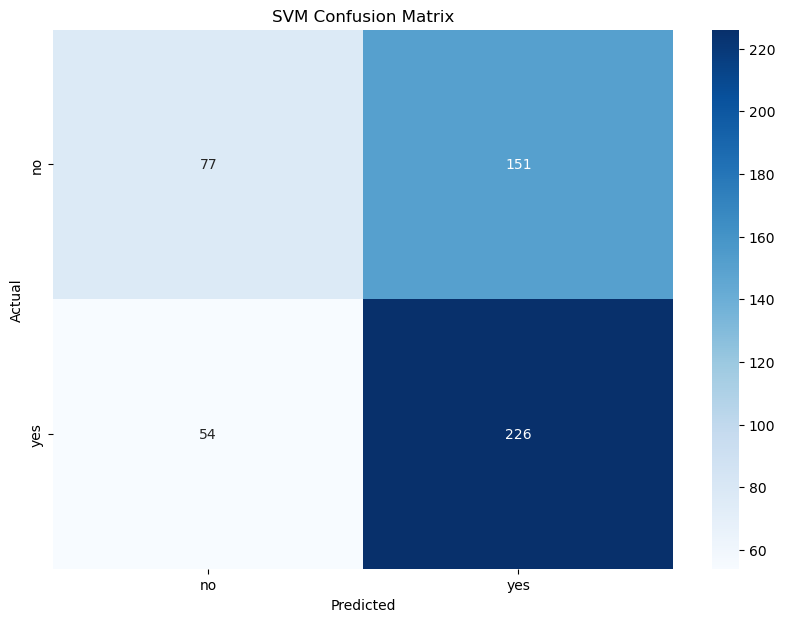

In [123]:
plot_confusion_matrix(y_test, y_pred_svm, labels=['no', 'yes'], title='SVM Confusion Matrix')

### Catboost

In [124]:
from catboost import CatBoostClassifier

# Initialize CatBoost
cat_clf = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, random_state=42, verbose=0)

# Train the model
cat_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_cat = cat_clf.predict(X_test)

# Evaluate the model
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       228
           1       0.88      0.90      0.89       280

    accuracy                           0.88       508
   macro avg       0.88      0.88      0.88       508
weighted avg       0.88      0.88      0.88       508



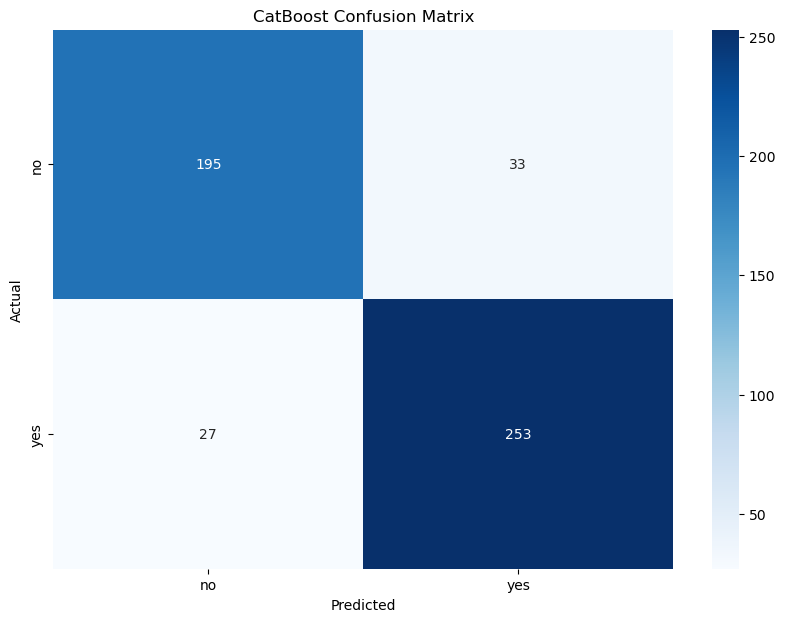

In [125]:
plot_confusion_matrix(y_test, y_pred_cat, labels=['no', 'yes'], title='CatBoost Confusion Matrix')

##### Summary

In [126]:
# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    }

# Evaluate all models and store the results in a list
results = []
results.append(evaluate_model(y_test, y_pred_lr, "Logistic Regression"))
results.append(evaluate_model(y_test, y_pred_dt, "Decision Tree"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))
results.append(evaluate_model(y_test, y_pred_svm, "SVM"))
results.append(evaluate_model(y_test, y_pred_cat, "CatBoost"))

# Create a DataFrame from the results
metrics_df = pd.DataFrame(results)
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.801181,0.807560,0.839286,0.823117
1,Decision Tree,0.805118,0.802676,0.857143,0.829016
2,Random Forest,0.860236,0.885609,0.857143,0.871143
3,SVM,0.596457,0.599469,0.807143,0.687976
4,CatBoost,0.881890,0.884615,0.903571,0.893993


In [127]:
# Print the best model based on the F1-Score
best_model = metrics_df.sort_values('F1-Score', ascending=False).iloc[0]
print(f"Best model based on F1-Score:\n{best_model}")

Best model based on F1-Score:
Model        CatBoost
Accuracy      0.88189
Precision    0.884615
Recall       0.903571
F1-Score     0.893993
Name: 4, dtype: object


### Feature importances

In [128]:
import shap

In [129]:
catboost_explainer = shap.TreeExplainer(cat_clf)
shap_values = catboost_explainer.shap_values(X_test)

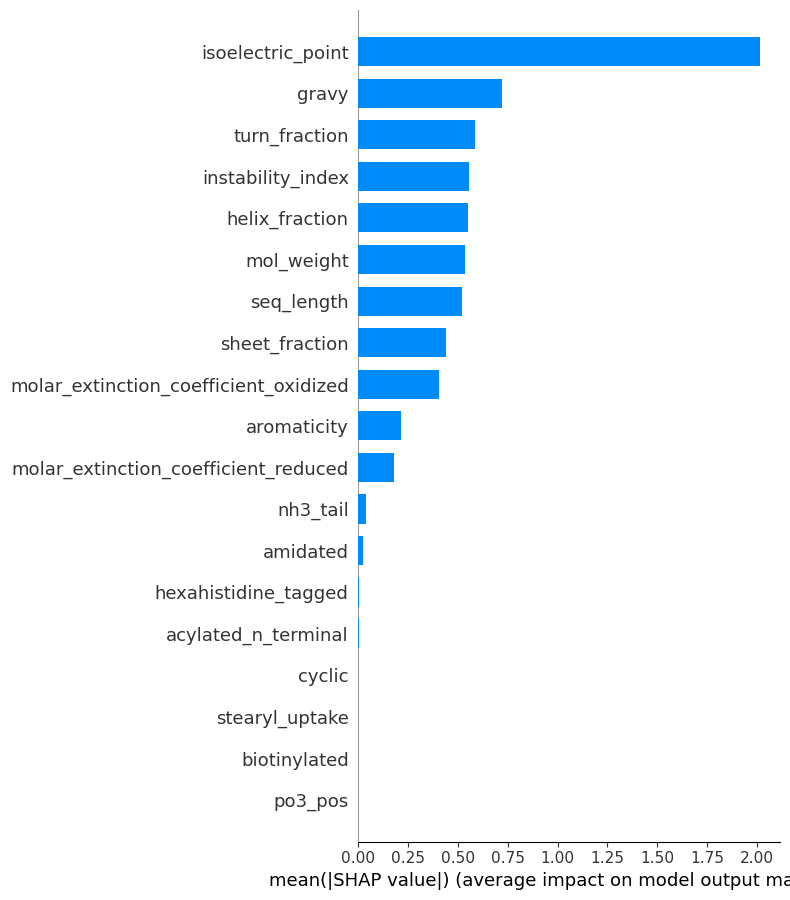

In [130]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

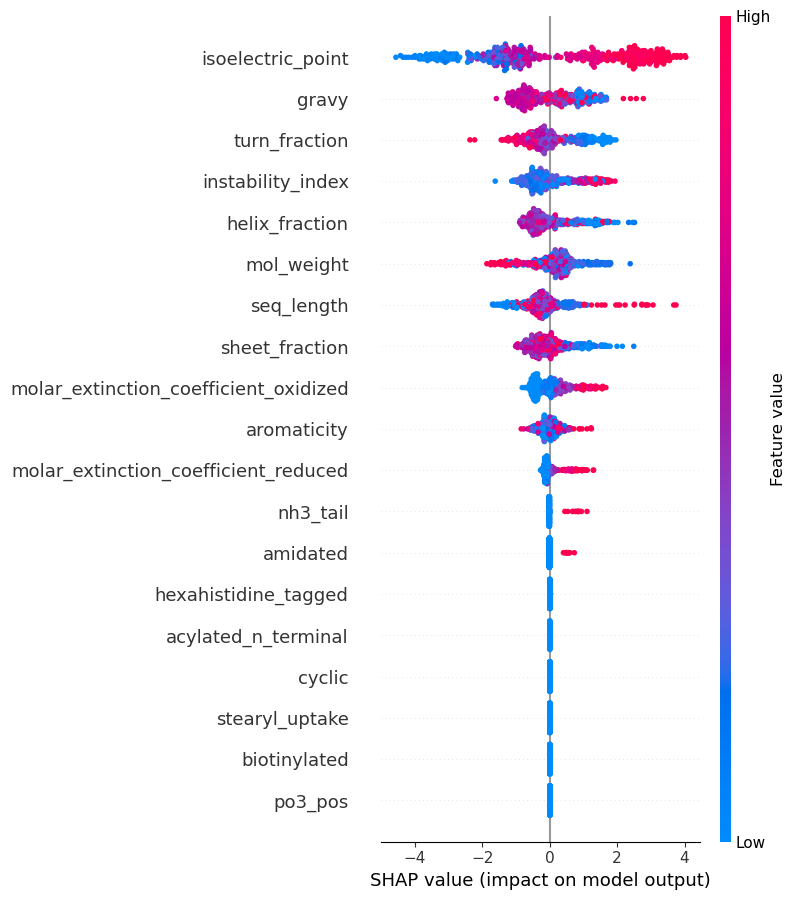

In [131]:
shap.summary_plot(shap_values, X_test)

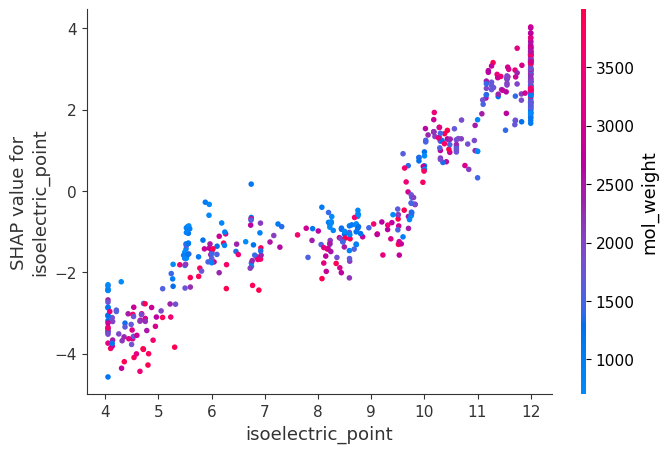

In [132]:
shap.dependence_plot('isoelectric_point', shap_values, X_test)

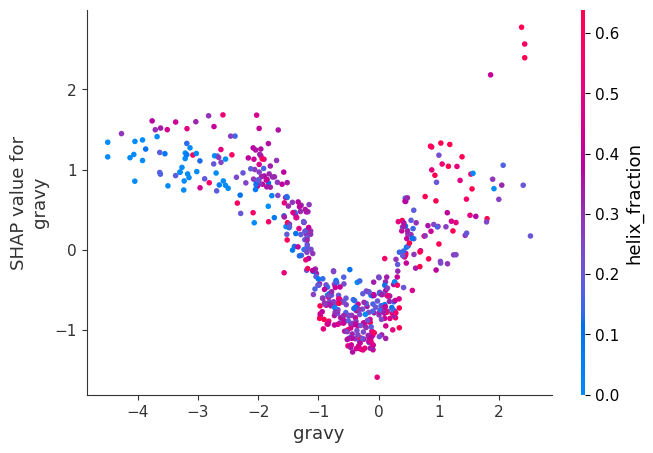

In [133]:
shap.dependence_plot('gravy', shap_values, X_test)

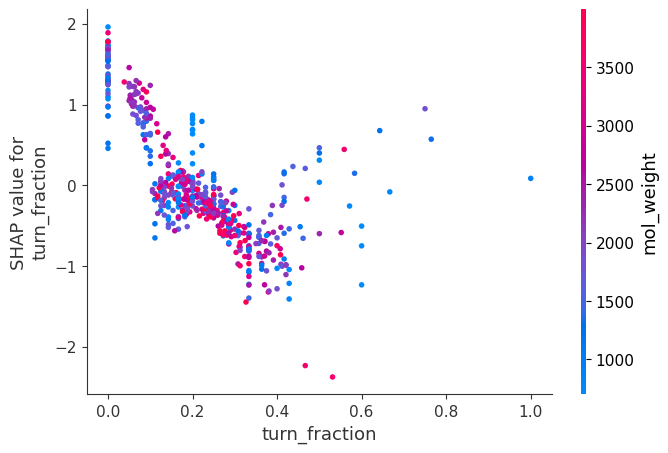

In [134]:
shap.dependence_plot('turn_fraction', shap_values, X_test)

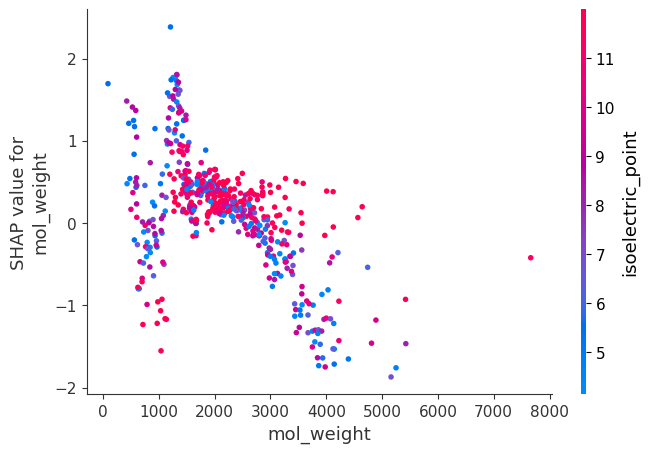

In [135]:
shap.dependence_plot('mol_weight', shap_values, X_test)

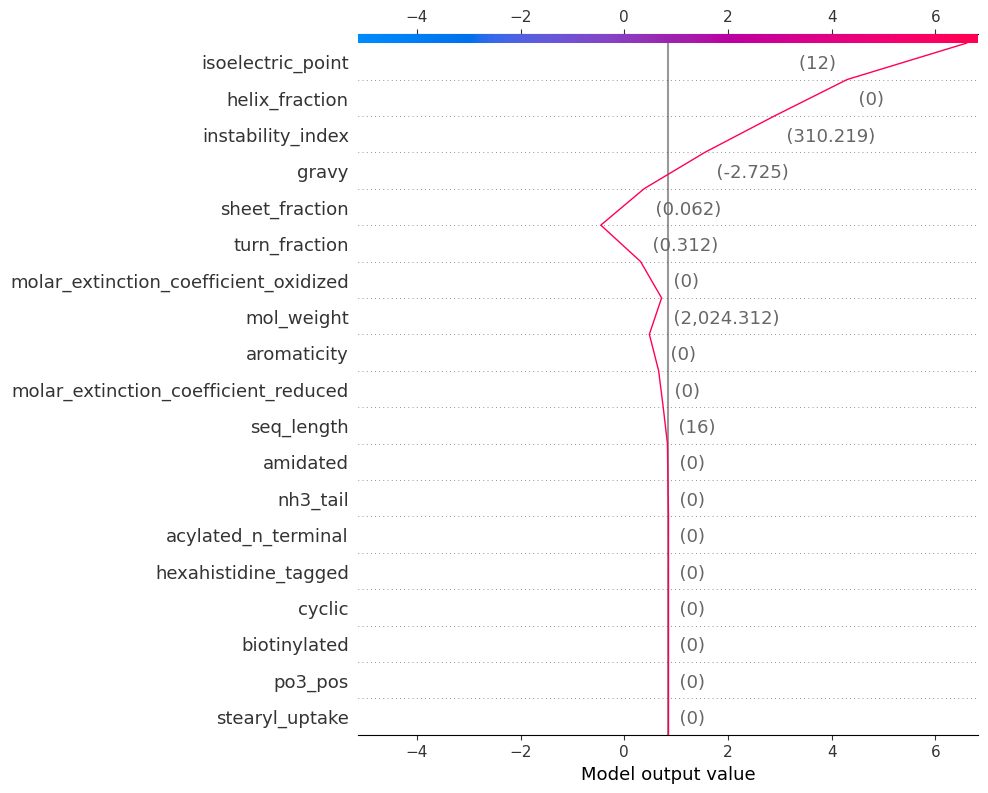

In [136]:
shap.decision_plot(catboost_explainer.expected_value, shap_values[0], X_test.iloc[0])